# Number Plate Detection

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

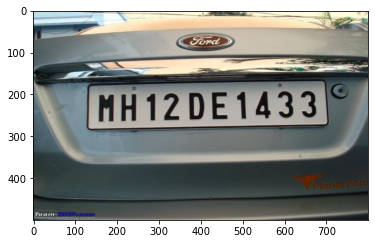

In [2]:
# Read image
image = cv2.imread('plate.jpeg')
image = cv2.resize(image, (800,500))
plt.imshow(image)

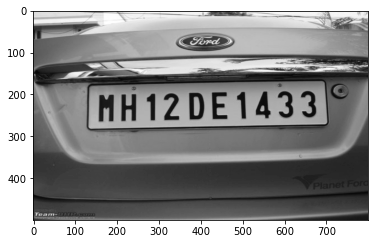

In [3]:
# grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

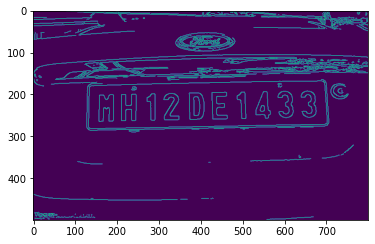

In [4]:
# edge detection
edges = cv2.Canny(gray, 170, 200)
plt.imshow(edges)

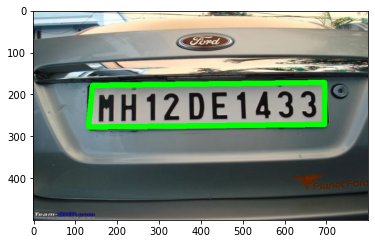

In [5]:
# finding contours
(cnts, _) = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

number_plate = None

# detecting 4 corners
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        number_plate = approx
        break
        
# number plate
cv2.drawContours(image, [number_plate], -1, (0,255,0), 12)
plt.imshow(image)